# Homework 6
## Due:  Tuesday, October 10 at 11:59 PM

# Problem 1: Bank Account Revisited

We are going to rewrite the bank account closure problem we had a few assignments ago, only this time developing a formal class for a Bank User and Bank Account to use in our closure (recall previously we just had a nonlocal variable amount that we changed). 

### Some Preliminaries:
First we are going to define two types of bank accounts.  Use the code below to do this:

In [1]:
from enum import Enum
class AccountType(Enum):
    SAVINGS = 1
    CHECKING = 2

An Enum stands for an enumeration, it's a convenient way for you to define lists of things. Typing:

In [2]:
AccountType.SAVINGS

<AccountType.SAVINGS: 1>

In [6]:
AccountType.CHECKING.value

2

returns a Python representation of an enumeration. You can compare these account types:

In [3]:
AccountType.SAVINGS == AccountType.SAVINGS

True

In [4]:
AccountType.SAVINGS == AccountType.CHECKING

False

To get a string representation of an Enum, you can use:

In [5]:
AccountType.SAVINGS.name

'SAVINGS'

In [6]:
raise ValueError("ba")

ValueError: ba

### Part 1: Create a BankAccount class with the following specification:

Constructor is `BankAccount(self, owner, accountType)` where `owner` is a string representing the name of the account owner and `accountType` is one of the AccountType enums

Methods `withdraw(self, amount)` and `deposit(self, amount)` to modify the account balance of the account

Override methods `__str__` to write an informative string of the account owner and the type of account, and `__len__` to return the balance of the account

In [7]:
class BankAccount():
    "Class Bank Account specifying owner and Account type"
    def __init__(self, owner, accountType):
        self.owner = owner
        self.balance = 0
        self.AccountType = accountType
        
    def withdraw(self,amount):
        if amount <= 0:
            raise ValueError("Cannot withdraw a negative value")
        if amount > self.balance:
            raise AttributeError("Insufficient funds")
        
        self.balance = self.balance - amount
        print("Withdrawal of ",amount," from account ",self.AccountType.name,". Remaining balance ", self.balance)
    
    def deposit(self,deposit):
        if deposit <=0:
            raise ValueError
        else:
            self.balance +=deposit
            print("Deposit of ", deposit, " and new balance is ", self.balance)
        
    def __str__(self):
        
        return "Owner of account "+ self.owner + " and account type is " + self.AccountType.name
    
    def __len__(self):
        #return the balance of acc
        return self.balance
    
Bankacc1 = BankAccount("Filip M", AccountType.SAVINGS) 
print(Bankacc1)

Bankacc1.deposit(100)
print(len(Bankacc1))
Bankacc1.withdraw(200)
        
        
        
        

Owner of account Filip M and account type is SAVINGS
Deposit of  100  and new balance is  100
100


AttributeError: Insufficient funds

### Part 2:  Write a class BankUser with the following specification:

Constructor `BankUser(self, owner)` where `owner` is the name of the account.

Method `addAccount(self, accountType)` - to start, a user will have no accounts when the BankUser object is created. `addAccount` will add a new account to the user of the `accountType` specified. **Only one savings/checking account per user, return appropriate error otherwise**

Methods `getBalance(self, accountType)`, `deposit(self, accountType, amount)`, and `withdraw(self, accountType, amount)` for a specific AccountType.

Override `__str__` to have an informative summary of user's accounts.

In [8]:
class BankUser():
    
    def __init__(self,owner):
        self.owner = owner
        self.savings = 0
        self.checking = 0
        self.myCaccount = 0
        self.mySaccount = 0
        
    def addAccount(self, accountType):
        #Check what account type and then whether the account is there
        if accountType == AccountType.SAVINGS:
            if self.savings == 0:
                self.savings = 1
                self.mySaccount = BankAccount(self.owner,accountType)
            
            else:
                raise ValueError("You already have a savings account")
                
        elif accountType == AccountType.CHECKING:
            if self.checking == 0:
                self.checking = 1
                self.myCaccount = BankAccount(self.owner,accountType)
            
            else:
                raise ValueError("You already have a checking account")
        else:
            raise ValueError("Account type is not valid")
    
    def getBalance(self,accountType):
        if accountType == AccountType.SAVINGS:
            if self.mySaccount == 0:
                raise ValueError("No savings account")
            else:
                return self.mySaccount.balance
            
        elif accountType == AccountType.CHECKING:
            if self.myCaccount == 0:
                raise ValueError("No checking account")
            else:
                return self.myCaccount.balance
        else:
            raise ValueError("Invalid account type inserted")
    
    def deposit(self,accountType,amount):
        if accountType == AccountType.SAVINGS:
            if self.mySaccount == 0:
                raise ValueError("No savings account")
            else:
                return self.mySaccount.deposit(amount)
            
        elif accountType == AccountType.CHECKING:
            if self.myCaccount == 0:
                raise ValueError("No checking account")
            else:
                return self.myCaccount.deposit(amount)
        
        else:
            raise ValueError("Invalid account type inserted")
            
    def withdraw(self,accountType,amount):
        #analogous to deposit
        if accountType == AccountType.SAVINGS:
            if self.mySaccount == 0:
                raise ValueError("No savings account")
            else:
                return self.mySaccount.withdraw(amount)
            
        elif accountType == AccountType.CHECKING:
            if self.myCaccount == 0:
                raise ValueError("No checking account")
            else:
                return self.myCaccount.withdraw(amount)
        
        else:
            raise ValueError("Invalid account type inserted")
        

In [9]:
user1 = BankUser("Filip")
user1.addAccount(AccountType.CHECKING)
#user1.addAccount(AccountType.SAVINGS)
user1.addAccount(AccountType.SAVINGS)
#user1.getBalance(AccountType.CHECKING)
user1.deposit(AccountType.CHECKING,7500)
user1.withdraw(AccountType.CHECKING,2500)

Deposit of  7500  and new balance is  7500
Withdrawal of  2500  from account  CHECKING . Remaining balance  5000


Write some simple tests to make sure this is working. Think of edge scenarios a user might try to do.

In [10]:
def test_withdraw_negative():
    try:
        user1 = BankUser("Filip")
        user1.addAccount(AccountType.CHECKING)
        #user1.addAccount(AccountType.CHECKING)
        user1.withdraw(AccountType.CHECKING,-2500)
    except ValueError as Valer:
        assert(type(Valer)==ValueError)

In [11]:
test_withdraw_negative()

### Part 3:  ATM Closure

Finally, we are going to rewrite a closure to use our bank account. We will make use of the [input function](http://anh.cs.luc.edu/python/hands-on/3.1/handsonHtml/io.html) which takes user input to decide what actions to take.

Write a closure called ATMSession(bankUser) which takes in a BankUser object. Return a method called Interface that when called, would provide the following interface:

First screen for user will look like:


**Enter Option:**

**1)Exit**

**2)Create Account**

**3)Check Balance**

**4)Deposit**

**5)Withdraw**


Pressing 1 will exit, any other option will show the options:



**Enter Option:**

**1)Checking**

**2)Savings**


If a deposit or withdraw was chosen, then there must be a third screen:



**Enter Integer Amount, Cannot Be Negative:**

This is to keep the code relatively simple, if you'd like you can also curate the options depending on the BankUser object (for example, if user has no accounts then only show the Create Account option), but this is up to you. In any case, you must handle any input from the user in a reasonable way that an actual bank would be okay with, and give the user a proper response to the action specified.

Upon finishing a transaction or viewing balance, it should go back to the original screen

In [12]:

def ATMSession(bankUser):
    def interface():
        while True:
            user_input = int(input('Enter Option: \n 1)Exit \n 2)Create Account \n 3)Check Balance \n 4)Deposit \n 5)Withdraw \n'))
            
            #Exit
            if user_input == 1:
                print("Exiting...")
                break
            
            #Create Account
            elif user_input == 2:
                try:
                    choice = int(input("\nEnter Option :\n1.Checking Account\n2.Savings Account\n\n"))
                    if (choice >2) or (choice<1):
                        raise ValueError
                except ValueError:
                    print("\n Invalid choice, retry")
                if choice ==1:
                    try:
                        bankUser.addAccount(AccountType.CHECKING)
                        print("Checking account created!")
                    except ValueError:
                        print("Checking already exists!")
                if choice ==2:
                    try:
                        bankUser.addAccount(AccountType.SAVINGS)
                        print("Savings account created!")
                    except ValueError:
                        print("Savings already exists!")
                
            #Check balance
            elif user_input == 3:   
                try:
                    choice = int(input("\nEnter Option :\n1.Checking Account\n2.Savings Account\n\n"))
                    if (choice >2) or (choice<1):
                        raise ValueError
                except ValueError:
                    print("\n Invalid choice, retry")
                if choice ==1:
                    try:
                        balance = bankUser.getBalance(AccountType.CHECKING)
                        print("Checking balance: ", balance)
                    except ValueError:
                        print("No checking account!")
                if choice ==2:
                    try:
                        balance = bankUser.getBalance(AccountType.SAVINGS)
                        print("Savings balance: ", balance)
                    except ValueError:
                        print("No savings account!")
            
            #Deposit
            elif user_input == 4:
                try:
                    choice = int(input("\nEnter Option :\n1.Checking Account\n2.Savings Account\n\n"))
                    if (choice >2) or (choice<1):
                        raise ValueError
                except ValueError:
                    print("\n Invalid choice, retry")
                    
                if choice ==1:
                    try:
                        deposit_amt = int(input("\nEnter Integer Amount, Cannot be Negative :\n"))
                        if deposit_amt < 0:
                            raise ValueError
                    except ValueError:
                        print("Amount invalid!")
                    if deposit_amt >= 0:
                        try:
                            bankUser.deposit(AccountType.CHECKING,deposit_amt)
                        except ValueError:
                            print("No checking account")
                        
                if choice ==2:
                    try:
                        deposit_amt = int(input("\nEnter Integer Amount, Cannot be Negative :\n"))
                        if deposit_amt < 0:
                            raise ValueError
                    except ValueError:
                        print("Amount invalid!")
                    if deposit_amt >= 0:
                        try:
                            bankUser.deposit(AccountType.SAVINGS,deposit_amt)
                        except ValueError:
                            print("No savings account")
            #Withdraw
            elif user_input == 5:
                try:
                    choice = int(input("\nEnter Option :\n1.Checking Account\n2.Savings Account\n\n"))
                    if (choice >2) or (choice<1):
                        raise ValueError
                except ValueError:
                    print("\n Invalid choice, retry")
                
                if choice ==1:
                    try:
                        withdraw_amt = int(input("\nEnter Integer Amount, Cannot be Negative :\n"))
                        if withdraw_amt < 0:
                            raise ValueError
                    except ValueError:
                        print("Amount invalid!")
                    
                    if withdraw_amt >= 0:
                        try:
                            bankUser.withdraw(AccountType.CHECKING,withdraw_amt)
                    
                        except ValueError:
                            print("No checking account!")
                    
                        except AttributeError:
                            print("not enough funds!")
                        
                if choice ==2:
                    try:
                        withdraw_amt = int(input("\nEnter Integer Amount, Cannot be Negative :\n"))
                        if withdraw_amt < 0:
                            raise ValueError
                    except ValueError:
                        print("Amount invalid!")
                    if withdraw_amt >= 0:
                        try:
                            bankUser.withdraw(AccountType.SAVINGS,withdraw_amt)
                    
                        except ValueError:
                            print("No savings account!")
                    
                        except AttributeError:
                            print("not enough funds!")
            else:
                print("Not a valid choice, try again")
                
                
    return interface

In [14]:
user = BankUser("Tomas")
sesh = ATMSession(user)
sesh()

Enter Option: 
 1)Exit 
 2)Create Account 
 3)Check Balance 
 4)Deposit 
 5)Withdraw 
2

Enter Option :
1.Checking Account
2.Savings Account

2
Savings account created!
Enter Option: 
 1)Exit 
 2)Create Account 
 3)Check Balance 
 4)Deposit 
 5)Withdraw 
2

Enter Option :
1.Checking Account
2.Savings Account

1
Checking account created!
Enter Option: 
 1)Exit 
 2)Create Account 
 3)Check Balance 
 4)Deposit 
 5)Withdraw 
4

Enter Option :
1.Checking Account
2.Savings Account

1

Enter Integer Amount, Cannot be Negative :
100
Deposit of  100  and new balance is  100
Enter Option: 
 1)Exit 
 2)Create Account 
 3)Check Balance 
 4)Deposit 
 5)Withdraw 
3

Enter Option :
1.Checking Account
2.Savings Account

1
Checking balance:  100
Enter Option: 
 1)Exit 
 2)Create Account 
 3)Check Balance 
 4)Deposit 
 5)Withdraw 
1
Exiting...



### Part 4:  Put everything in a module Bank.py

We will be grading this problem with a test suite. Put the enum, classes, and closure in a single file named Bank.py. It is very important that the class and method specifications we provided are used (with the same capitalization), otherwise you will receive no credit.

In [15]:
%%file Bank.py

from enum import Enum
class AccountType(Enum):
    SAVINGS = 1
    CHECKING = 2
######################

class BankAccount():
    "Class Bank Account specifying owner and Account type"
    def __init__(self, owner, accountType):
        self.owner = owner
        self.balance = 0
        self.AccountType = accountType
        
    def withdraw(self,amount):
        if amount <= 0:
            raise ValueError("Cannot withdraw a negative value")
        if amount > self.balance:
            raise AttributeError("Insufficient funds")
        
        self.balance = self.balance - amount
        print("Withdrawal of ",amount," from account ",self.AccountType.name,". Remaining balance ", self.balance)
    
    def deposit(self,deposit):
        if deposit <=0:
            raise ValueError
        else:
            self.balance +=deposit
            print("Deposit of ", deposit, " and new balance is ", self.balance)
        
    def __str__(self):
        
        return "Owner of account "+ self.owner + " and account type is " + self.AccountType.name
    
    def __len__(self):
        #return the balance of acc
        return self.balance

######################

class BankUser():
    
    def __init__(self,owner):
        self.owner = owner
        self.savings = 0
        self.checking = 0
        self.myCaccount = 0
        self.mySaccount = 0
        
    def addAccount(self, accountType):
        #Check what account type and then whether the account is there
        if accountType == AccountType.SAVINGS:
            if self.savings == 0:
                self.savings = 1
                self.mySaccount = BankAccount(self.owner,accountType)
            
            else:
                raise ValueError("You already have a savings account")
                
        elif accountType == AccountType.CHECKING:
            if self.checking == 0:
                self.checking = 1
                self.myCaccount = BankAccount(self.owner,accountType)
            
            else:
                raise ValueError("You already have a checking account")
        else:
            raise ValueError("Account type is not valid")
    
    def getBalance(self,accountType):
        if accountType == AccountType.SAVINGS:
            if self.mySaccount == 0:
                raise ValueError("No savings account")
            else:
                return self.mySaccount.balance
            
        elif accountType == AccountType.CHECKING:
            if self.myCaccount == 0:
                raise ValueError("No checking account")
            else:
                return self.myCaccount.balance
        else:
            raise ValueError("Invalid account type inserted")
    
    def deposit(self,accountType,amount):
        if accountType == AccountType.SAVINGS:
            if self.mySaccount == 0:
                raise ValueError("No savings account")
            else:
                return self.mySaccount.deposit(amount)
            
        elif accountType == AccountType.CHECKING:
            if self.myCaccount == 0:
                raise ValueError("No checking account")
            else:
                return self.myCaccount.deposit(amount)
        
        else:
            raise ValueError("Invalid account type inserted")
            
    def withdraw(self,accountType,amount):
        #analogous to deposit
        if accountType == AccountType.SAVINGS:
            if self.mySaccount == 0:
                raise ValueError("No savings account")
            else:
                return self.mySaccount.withdraw(amount)
            
        elif accountType == AccountType.CHECKING:
            if self.myCaccount == 0:
                raise ValueError("No checking account")
            else:
                return self.myCaccount.withdraw(amount)
        
        else:
            raise ValueError("Invalid account type inserted")
        
######################

def ATMSession(bankUser):
    def interface():
        while True:
            user_input = int(input('Enter Option: \n 1)Exit \n 2)Create Account \n 3)Check Balance \n 4)Deposit \n 5)Withdraw \n'))
            
            #Exit
            if user_input == 1:
                print("Exiting...")
                break
            
            #Create Account
            elif user_input == 2:
                try:
                    choice = int(input("\nEnter Option :\n1.Checking Account\n2.Savings Account\n\n"))
                    if (choice >2) or (choice<1):
                        raise ValueError
                except ValueError:
                    print("\n Invalid choice, retry")
                if choice ==1:
                    try:
                        bankUser.addAccount(AccountType.CHECKING)
                        print("Checking account created!")
                    except ValueError:
                        print("Checking already exists!")
                if choice ==2:
                    try:
                        bankUser.addAccount(AccountType.SAVINGS)
                        print("Savings account created!")
                    except ValueError:
                        print("Savings already exists!")
                
            #Check balance
            elif user_input == 3:   
                try:
                    choice = int(input("\nEnter Option :\n1.Checking Account\n2.Savings Account\n\n"))
                    if (choice >2) or (choice<1):
                        raise ValueError
                except ValueError:
                    print("\n Invalid choice, retry")
                if choice ==1:
                    try:
                        balance = bankUser.getBalance(AccountType.CHECKING)
                        print("Checking balance: ", balance)
                    except ValueError:
                        print("No checking account!")
                if choice ==2:
                    try:
                        balance = bankUser.getBalance(AccountType.SAVINGS)
                        print("Savings balance: ", balance)
                    except ValueError:
                        print("No savings account!")
            
            #Deposit
            elif user_input == 4:
                try:
                    choice = int(input("\nEnter Option :\n1.Checking Account\n2.Savings Account\n\n"))
                    if (choice >2) or (choice<1):
                        raise ValueError
                except ValueError:
                    print("\n Invalid choice, retry")
                    
                if choice ==1:
                    try:
                        deposit_amt = int(input("\nEnter Integer Amount, Cannot be Negative :\n"))
                        if deposit_amt < 0:
                            raise ValueError
                    except ValueError:
                        print("Amount invalid!")
                    if deposit_amt >= 0:
                        try:
                            bankUser.deposit(AccountType.CHECKING,deposit_amt)
                        except ValueError:
                            print("No checking account")
                        
                if choice ==2:
                    try:
                        deposit_amt = int(input("\nEnter Integer Amount, Cannot be Negative :\n"))
                        if deposit_amt < 0:
                            raise ValueError
                    except ValueError:
                        print("Amount invalid!")
                    if deposit_amt >= 0:
                        try:
                            bankUser.deposit(AccountType.SAVINGS,deposit_amt)
                        except ValueError:
                            print("No savings account")
            #Withdraw
            elif user_input == 5:
                try:
                    choice = int(input("\nEnter Option :\n1.Checking Account\n2.Savings Account\n\n"))
                    if (choice >2) or (choice<1):
                        raise ValueError
                except ValueError:
                    print("\n Invalid choice, retry")
                
                if choice ==1:
                    try:
                        withdraw_amt = int(input("\nEnter Integer Amount, Cannot be Negative :\n"))
                        if withdraw_amt < 0:
                            raise ValueError
                    except ValueError:
                        print("Amount invalid!")
                    
                    if withdraw_amt >= 0:
                        try:
                            bankUser.withdraw(AccountType.CHECKING,withdraw_amt)
                    
                        except ValueError:
                            print("No checking account!")
                    
                        except AttributeError:
                            print("not enough funds!")
                        
                if choice ==2:
                    try:
                        withdraw_amt = int(input("\nEnter Integer Amount, Cannot be Negative :\n"))
                        if withdraw_amt < 0:
                            raise ValueError
                    except ValueError:
                        print("Amount invalid!")
                    if withdraw_amt >= 0:
                        try:
                            bankUser.withdraw(AccountType.SAVINGS,withdraw_amt)
                    
                        except ValueError:
                            print("No savings account!")
                    
                        except AttributeError:
                            print("not enough funds!")
            else:
                print("Not a valid choice, try again")
                
                
    return interface

Overwriting Bank.py


---

## Problem 2:  Linear Regression Class

Let's say you want to create Python classes for three related types of linear regression: Ordinary Least Squares Linear Regression, Ridge Regression, and Lasso Regression. 

Consider the multivariate linear model:

$$y = X\beta + \epsilon$$

where $y$ is a length $n$ vector, $X$ is an $m \times p$ matrix, and $\beta$
is a $p$ length vector of coefficients.

#### Ordinary Least Squares Linear Regression

[OLS Regression](https://en.wikipedia.org/wiki/Ordinary_least_squares) seeks to minimize the following cost function:

$$\|y - \beta\mathbf {X}\|^{2}$$

The best fit coefficients can be obtained by:

$$\hat{\beta} = (X^T X)^{-1}X^Ty$$

where $X^T$ is the transpose of the matrix $X$ and $X^{-1}$ is the inverse of the matrix $X$.

#### Ridge Regression

[Ridge Regression](https://en.wikipedia.org/wiki/Tikhonov_regularization) introduces an L2 regularization term to the cost function:

$$\|y - \beta\mathbf {X}\|^{2}+\|\Gamma \mathbf {x} \|^{2}$$

Where $\Gamma = \alpha I$ for some constant $\alpha$ and the identity matrix $I$.

The best fit coefficients can be obtained by:
$$\hat{\beta} = (X^T X+\Gamma^T\Gamma)^{-1}X^Ty$$

#### Lasso Regression

[Lasso Regression](https://en.wikipedia.org/wiki/Lasso_%28statistics%29) introduces an L1 regularization term and restricts the total number of predictor variables in the model.
The following cost function:
$${\displaystyle \min _{\beta _{0},\beta }\left\{{\frac {1}{m}}\left\|y-\beta _{0}-X\beta \right\|_{2}^{2}\right\}{\text{ subject to }}\|\beta \|_{1}\leq \alpha.}$$

does not have a nice closed form solution. For the sake of this exercise, you may use the [sklearn.linear_model.Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) class, which uses a coordinate descent algorithm to find the best fit. You should only use the class in the fit() method of this exercise (ie. do not re-use the sklearn for other methods in your class).

#### $R^2$ score

The $R^2$ score is defined as:
$${R^{2} = {1-{SS_E \over SS_T}}}$$

Where:

$$SS_T=\sum_i (y_i-\bar{y})^2, SS_R=\sum_i (\hat{y_i}-\bar{y})^2, SS_E=\sum_i (y_i - \hat{y_i})^2$$

where  ${y_i}$ are the original data values, $\hat{y_i}$ are the predicted values, and $\bar{y_i}$ is the mean of the original data values.

### Part 1:  Base Class
Write a class called `Regression` with the following methods:

$fit(X, y)$: Fits linear model to $X$ and $y$.

$get\_params()$: Returns $\hat{\beta}$ for the fitted model. The parameters should be stored in a dictionary.

$predict(X)$: Predict new values with the fitted model given $X$.

$score(X, y)$: Returns $R^2$ value of the fitted model.

$set\_params()$: Manually set the parameters of the linear model.

This parent class should throw a `NotImplementedError` for methods that are intended to be implemented by subclasses.

In [22]:
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import load_boston 
from sklearn.model_selection import train_test_split

boston = load_boston()
x_train, x_test, y_train,y_test = train_test_split(boston.data,boston.target, test_size=0.3)

In [23]:
class Regression:
    
    def __init__(self):
        self.X = 0
        self.y = 0
        self.betas = 0
        self.alpha=0.1
        
    def fit(self,X,y):
        #reshape x and y arrays to get the right matrices for regre

        raise NotImplementedError("Subclasses should implement this!")
        
    def get_params(self):
        self_betas=self.betas.reshape(-1,1)
        #print(self.betas.shape)
        betas_dict={}
        for index,value in enumerate(self.betas):
            betas_dict[index]=value
        return betas_dict
    
    def predict(self,X):
        #print(self.betas.shape)
        #print(sm.add_constant(X).T.shape)
        #print(self.betas)
        #print(sm.add_constant(X).T)
        ypred = np.dot(self.betas,(sm.add_constant(X).T))
        
        #raise NotImplementedError("Subclasses should implement this!")
        return ypred
        
    def score(self,X,y):
        ypred = self.predict(X)
        ypred = ypred.reshape(-1,1)
        #print(ypred)
        y_mean=np.mean(y)
        y=y.reshape(-1,1)
        #print("y_mean")
        #print(y_mean)
        #print("y-y_pred")
        #print((y - ypred)*(y - ypred))
        #print(((y - ypred)).shape)
        #print((y - y_mean)*(y-y_mean))
        #print(np.sum((y - y_mean**2)))
        score = 1- (np.sum((y - ypred)*(y - ypred))/np.sum((y - y_mean)*(y - y_mean)))
        #raise NotImplementedError("Subclasses should implement this!")
        return score
        
    def set_params(self,alpha):
        self.alpha = alpha

        

### Part 2: OLS Linear Regression

Write a class called `OLSRegression` that implements the OLS Regression model described above and inherits the `Regression` class.

In [24]:
class OLSRegression(Regression):
    
    
    def fit(self,X,y,alpha):
        #reshape x and y arrays to get the right matrices for regre
        self.X = X
        self.y= y
        #x_train = self.X.reshape(len(self.X),1)
        #y_train = self.y.reshape(len(self.y),1)

        #build matrix X by concatenating predictors and a column of ones
        n = x_train.shape[0]
        ones_col = np.ones((n, 1))
        X = np.concatenate((ones_col, x_train), axis=1)

        #matrix X^T X
        LHS = np.dot(np.transpose(X), X)
        #print(LHS)
        #matrix X^T Y
        RHS = np.dot(np.transpose(X), y_train)

        #solution beta to normal equations, since LHS is invertible by construction
        self.betas = np.dot(np.linalg.inv(LHS), RHS)
        #print(self.betas)
        #print(self.betas.shape)
        #return None

        

In [25]:
test_regr1 = OLSRegression()

In [26]:
test_regr1.fit(x_train,y_train,0.1)
#test_regr1.score(x_train,y_train)


In [27]:
test_regr1.predict(x_train)

array([ 20.52974455,  19.98928239,  13.65420587,  24.70642783,
        15.47305919,  30.69513499,  25.69178005,  19.34999862,
        36.21549819,  24.82885967,  20.51146241,  16.77180548,
        28.41810409,  22.31375017,  23.87153054,  13.06183752,
        19.95705772,  13.85072981,  30.74553806,  16.75459321,
        29.53204314,  41.22325448,  14.12796562,  15.99693206,
        22.14404271,  16.07044265,  27.24429376,  18.35328171,
        37.20518602,  22.52228393,  16.7408396 ,  21.04223439,
        15.23774152,  31.81855958,  13.89086766,  38.251358  ,
        29.44560671,  21.46294566,  19.84310944,  30.25371925,
        20.17459937,  23.70940128,  18.02175722,  20.03296175,
        26.2070192 ,  17.84613348,  26.8104971 ,  16.00910917,
        31.47979871,  33.4998116 ,  19.80866886,  34.83941401,
        25.5397588 ,  35.84692659,  22.87667782,  23.85937147,
        11.45346057,  24.02392024,   2.50280306,  17.99923919,
        25.07564157,  22.22173205,  26.96913449,  23.39

In [28]:
test_regr1.score(x_train,y_train)

0.76111530635683899

### Part 3: Ridge Regression

Write a class called `RidgeRegression` that implements Ridge Regression and inherits the `OLSRegression` class.

$$\hat{\beta} = (X^T X+\Gamma^T\Gamma)^{-1}X^Ty$$

In [29]:
class RidgeRegression(OLSRegression):
    
    def fit(self,X,y,alpha):
        self.X = X
        self.y= y
        #x_train = self.X.reshape(len(self.X),1)
        #y_train = self.y.reshape(len(self.y),1)
        
        
        #build matrix X by concatenating predictors and a column of ones
        n = x_train.shape[0]
        ones_col = np.ones((n, 1))
        X = np.concatenate((ones_col, x_train), axis=1)
        
        
        #matrix X^T X
        LHS = np.dot(np.transpose(X), X)
        #print(LHS)
        gamma = alpha*np.eye(LHS.shape[0])
        #print(gamma)
        gammas = np.dot(np.transpose(gamma), gamma)
        
        
        #matrix X^T Y
        RHS = np.dot(np.transpose(X), y_train)

        #solution beta to normal equations, since LHS is invertible by construction
        self.betas = np.dot(np.linalg.inv(LHS+gammas), RHS)
        #print(self.betas)
        #print(self.betas)
        #print(self.betas.shape)
        return None

In [30]:
test_ridge = RidgeRegression()

In [31]:
test_ridge.fit(x_train,y_train,0.5)

In [32]:
test_ridge.predict(x_train)

array([ 21.24781879,  20.21693602,  14.30589808,  25.61353342,
        15.787484  ,  30.64617385,  26.45585716,  20.06304248,
        36.15717854,  24.94345697,  20.36135742,  17.24172292,
        29.02741756,  21.33842152,  23.40716414,  12.93963528,
        20.27908911,  14.18229015,  30.86111404,  16.80033824,
        28.95759998,  41.24011083,  14.4967435 ,  16.31514269,
        21.79942874,  15.25067328,  26.93455387,  18.20055614,
        36.9585019 ,  23.71526543,  17.96929015,  21.30542904,
        15.21757511,  31.8421332 ,  14.3687417 ,  38.18562526,
        29.35584909,  21.10747036,  19.58179916,  29.8079199 ,
        19.91822921,  23.74697316,  18.43782733,  20.16733095,
        26.21699098,  17.73779297,  27.46029243,  16.73483976,
        31.11005419,  32.58973215,  20.52170859,  35.09438706,
        25.37460049,  35.81748451,  22.23657318,  23.67727221,
        12.3153113 ,  23.07424805,   1.98173518,  17.78880785,
        24.98356504,  22.09289423,  26.78576337,  23.02

In [33]:
test_ridge.get_params()

{0: 23.04886805877868,
 1: -0.080325779169895029,
 2: 0.057484822463801599,
 3: 0.050796561531679885,
 4: 3.4842043348288314,
 5: -12.605073123663615,
 6: 4.6752870556551329,
 7: 0.00076775107373583396,
 8: -1.3637888764617543,
 9: 0.27006512486006784,
 10: -0.013904570952351314,
 11: -0.65808046492648486,
 12: 0.0083220527162465308,
 13: -0.53492486330512534}

In [34]:
test_ridge.score(x_train,y_train)

0.75822136979031962

In [35]:
test_ridge.get_params()

{0: 23.04886805877868,
 1: -0.080325779169895029,
 2: 0.057484822463801599,
 3: 0.050796561531679885,
 4: 3.4842043348288314,
 5: -12.605073123663615,
 6: 4.6752870556551329,
 7: 0.00076775107373583396,
 8: -1.3637888764617543,
 9: 0.27006512486006784,
 10: -0.013904570952351314,
 11: -0.65808046492648486,
 12: 0.0083220527162465308,
 13: -0.53492486330512534}

### Part 3: Lasso Regression

Write a class called `LassoRegression` that implements Lasso Regression and inherits the `OLSRegression` class. You should only use Lasso(), Lasso.fit(), Lasso.coef_, and Lasso._intercept from the `sklearn.linear_model.Lasso` class.

In [36]:
from sklearn.linear_model import Lasso

In [37]:
class LassoRegression(OLSRegression):
    
    def fit(self,X,y,alpha):
        #X=X.reshape(len(X),1)
        #y=y.reshape(len(y),1)
        
        model = Lasso(alpha=self.alpha,fit_intercept=True)
        fitted_model= model.fit(X,y)
        intercept = fitted_model.intercept_
        coeffs = np.array(fitted_model.coef_)
        self.betas=np.insert(coeffs,0,intercept)
        #self.betas = self.betas.reshape(-1,1)
        #=np.array([fitted_model.intercept_[0],fitted_model.coef_[i]]).reshape(-1,1)
        #print(self.betas)
        

In [38]:
print(x_train.shape)
print(y_train.shape)

(354, 13)
(354,)


In [39]:
lasso_test= LassoRegression()
lasso_test.fit(x_train,y_train,0.1)
#lasso_test.get_params()

In [40]:
lasso_test.score(x_train,y_train)

0.74488469527233603

In [41]:
lasso_test.get_params()

{0: 22.444381986603894,
 1: -0.077320489892015107,
 2: 0.05629400045735157,
 3: -0.003103444914825611,
 4: 1.7197784836162342,
 5: -0.0,
 6: 4.0296388906570311,
 7: -0.0066875567361921514,
 8: -1.1810529020277321,
 9: 0.27792654896255442,
 10: -0.016688113586456728,
 11: -0.64290457943134893,
 12: 0.0077682311857501319,
 13: -0.59858632757872432}

### Part 4: Model Scoring
You will use the [Boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) for this part.

Instantiate each of the three models above.  Using a for loop, fit (on the training data) and score (on the testing data) each model on the Boston dataset.  

Print out the $R^2$ value for each model and the parameters for the best model using the `get_params()` method. Use an $\alpha$ value of 0.1.

**Hint:**  You can consider using the `sklearn.model_selection.train_test_split` method to create the training and test datasets.

In [42]:
from sklearn.datasets import load_boston 
from sklearn.model_selection import train_test_split

boston = load_boston()
#print(boston.target)
#print(boston.data)

x_train, x_test, y_train,y_test = train_test_split(boston.data,boston.target, test_size=0.3)


#print(x_train.shape)

modelOLS = OLSRegression()
modelRidge = RidgeRegression()
modelLasso = LassoRegression()

models = [modelOLS, modelRidge, modelLasso]
names =["model OLS", "model Ridge", "model Lasso"]
for i,model in enumerate(models):
    print(names[i])
    model.fit(x_train,y_train,alpha=0.1)
    print("R^2")
    score=model.score(x_test,y_test)
    print(score)
    print("Best params")
    params = model.get_params()
    print(params)



model OLS
R^2
0.770341472215
Best params
{0: 39.59702135855332, 1: -0.12426044832553829, 2: 0.053004254326277866, 3: 0.085065019639487538, 4: 1.8158907200986931, 5: -17.905637822656331, 6: 3.3350027050515791, 7: 0.0076304412432537383, 8: -1.5333664556416089, 9: 0.32411746449902523, 10: -0.01494561187436938, 11: -0.88508266348486586, 12: 0.0080411520010114368, 13: -0.61566993516816382}
model Ridge
R^2
0.770510162073
Best params
{0: 38.892235375335076, 1: -0.12393955668081835, 2: 0.053106643673784593, 3: 0.083839407025728008, 4: 1.8123771274652398, 5: -17.495230655982141, 6: 3.3691034487289926, 7: 0.007405832848828009, 8: -1.5230545619794782, 9: 0.32106972353163599, 10: -0.014898080570346472, 11: -0.87345433618065726, 12: 0.0081235443760571957, 13: -0.61439869640398825}
model Lasso
R^2
0.744830310794
Best params
{0: 29.103854823582274, 1: -0.11491301266484528, 2: 0.055647592913986736, 3: 0.015951792731530648, 4: 0.0, 5: -0.0, 6: 3.1908388867900466, 7: -0.0026044569998016883, 8: -1.245438

### Part 5: Visualize Model Performance

We can evaluate how the models perform for various values of $\alpha$. Calculate the $R^2$ scores for each model for  $\alpha \in [0.05, 1]$ and plot the three lines on the same graph. To change the parameters, use the `set_params()` method. Be sure to label each line and add axis labels.

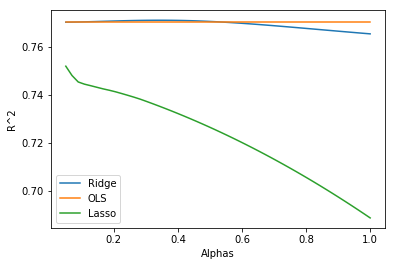

In [43]:
import matplotlib.pyplot as plt
alphas = np.linspace(0.05,1,num=50)

modelOLS1 = OLSRegression()
modelRidge1 = RidgeRegression()
modelLasso1 = LassoRegression()

scoreOLS =[]
scoreRidge = []
scoreLasso =[]

for alpha in alphas:
    
    modelOLS1.fit(x_train,y_train,alpha=alphas)
    scoreOLS.append(modelOLS1.score(x_test,y_test))
    
    modelRidge1.set_params(alpha)
    modelRidge1.fit(x_train,y_train,alpha=alpha)
    scoreRidge.append(modelRidge1.score(x_test,y_test))
    
    modelLasso1.set_params(alpha)
    modelLasso1.fit(x_train,y_train,alpha=alpha)
    scoreLasso.append(modelLasso1.score(x_test,y_test))
    
    #score=model.score(x_test,y_test)
#print(scoreLasso)

plt.plot(alphas,scoreRidge,label="Ridge")
plt.plot(alphas,scoreOLS,label="OLS")
plt.plot(alphas,scoreLasso,label="Lasso")
plt.xlabel("Alphas")
plt.ylabel("R^2")
plt.legend()
plt.show()